In [9]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import yaml
from tqdm import tqdm
import seaborn as sns
import cProfile

In [2]:
# Adding path to module
sys.path.append("../")
# picture path
PICS = "../pics/"
par_sets = "./par"

In [3]:
# Module imports
from contagion import Contagion, config
from contagion.config import _baseconfig

In [4]:
#my_config = yaml.safe_load(open("fitted_config.yaml"))
my_config = yaml.safe_load(open("par_set_4.yaml"))
#print(my_config)

this_config = dict(_baseconfig)
this_config.update(my_config)

In [5]:
# Benchmark 1
this_config["measures"]["contact tracing"] = True
this_config["measures"]["second order"] = False
this_config["measures"]["tracked fraction"] = 0.
this_config["measures"]["backtrack length"] = 0.
this_config["measures"]["track uninfected"] = False

this_config["measures"]["quarantine"] = True
this_config["measures"]["report symptomatic"] = True
this_config["measures"]["quarantine duration"] = 14.

this_config["measures"]["testing"] = False
this_config["measures"]["time until test"] = 0.
this_config["measures"]["time until result"] = 0.

In [6]:
# Benchmark 2
this_config["measures"]["contact tracing"] = True
this_config["measures"]["second order"] = False
this_config["measures"]["tracked fraction"] = 0.1
this_config["measures"]["backtrack length"] = 0.
this_config["measures"]["track uninfected"] = False

this_config["measures"]["quarantine"] = True
this_config["measures"]["report symptomatic"] = True
this_config["measures"]["quarantine duration"] = 14.

this_config["measures"]["testing"] = False
this_config["measures"]["time until test"] = 0.
this_config["measures"]["time until result"] = 0.

In [7]:
# Benchmark 3
this_config["measures"]["contact tracing"] = True
this_config["measures"]["second order"] = False
this_config["measures"]["tracked fraction"] = 0.35
this_config["measures"]["backtrack length"] = 0.
this_config["measures"]["track uninfected"] = False

this_config["measures"]["quarantine"] = True
this_config["measures"]["report symptomatic"] = True
this_config["measures"]["quarantine duration"] = 14.

this_config["measures"]["testing"] = False
this_config["measures"]["time until test"] = 0.
this_config["measures"]["time until result"] = 0.

this_config["scenario"]["sim_length"] = 200

In [8]:
# Benchmark 4
this_config["measures"]["contact tracing"] = True
this_config["measures"]["second order"] = False
this_config["measures"]["tracked fraction"] = 0.35
this_config["measures"]["backtrack length"] = 14.
this_config["measures"]["track uninfected"] = False

this_config["measures"]["quarantine"] = True
this_config["measures"]["report symptomatic"] = True
this_config["measures"]["quarantine duration"] = 14.

this_config["measures"]["testing"] = False
this_config["measures"]["time until test"] = 0.
this_config["measures"]["time until result"] = 0.

this_config["scenario"]["sim_length"] = 200

In [5]:
# Testimg
this_config["measures"]["contact tracing"] = False
this_config["measures"]["second order"] = False
this_config["measures"]["tracked fraction"] = 1
this_config["measures"]["backtrack length"] = 14.
this_config["measures"]["track uninfected"] = False

this_config["measures"]["quarantine"] = True
this_config["measures"]["report symptomatic"] = True
this_config["measures"]["quarantine duration"] = 14.

this_config["measures"]["testing"] = True
this_config["measures"]["time until test"] = 1
this_config["measures"]["time until result"] = 4

this_config["scenario"]["sim_length"] = 200

In [6]:
stats = []
for i in tqdm(range(0, 10)):
    this_config["general"]["random state seed"] = i
    contagion = Contagion(userconfig=this_config)
    contagion.sim()
    stat = pd.DataFrame(contagion.statistics)
    stats.append(stat)

100%|██████████████████████████████████████████| 10/10 [00:28<00:00,  2.86s/it]


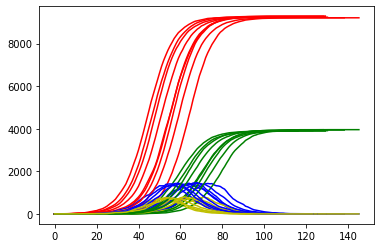

In [8]:
for res in stats:
    plt.plot(res["is_infected"] + res["is_recovered"], "r")
    plt.plot(res["is_tested"], "b")
    plt.plot(res["is_tested_positive"], "g")
    plt.plot(res["will_test_negative"], "y")

In [13]:
import random
random.uniform(0, 1)

0.46300735781502145

In [10]:
profile = cProfile.Profile()
profile.enable()
contagion.sim()
profile.disable()
profile.dump_stats("profile.prof")

In [7]:
stats_concat = pd.concat((s for s in stats))

In [8]:
by_row_index = stats_concat.groupby(stats_concat.index)
stat_means = by_row_index.mean()
stat_var = by_row_index.std()

In [9]:
stat_means.to_pickle("means_benchmar4_par4_randSeed.pkl")
stat_var.to_pickle("var_benchmark4_par4_randSeed.pkl")

In [ ]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(10, 10))

colors = sns.color_palette("colorblind", 3)

ax[0].plot(stat_means["is_infected"], label="Infected", color=colors[0])
ax[0].fill_between(
    range(0, len(stat_means["is_infected"]), 1),
    stat_means["is_infected"] - stat_var["is_infected"] / 2.0,
    stat_means["is_infected"] + stat_var["is_infected"] / 2.0,
    color=colors[0],
    alpha=0.5,
)
ax[0].plot(stat_means["is_recovered"], label="Recovered", color=colors[1])
ax[0].fill_between(
    range(0, len(stat_means["is_recovered"]), 1),
    stat_means["is_recovered"] - stat_var["is_recovered"] / 2.0,
    stat_means["is_recovered"] + stat_var["is_recovered"] / 2.0,
    color=colors[1],
    alpha=0.5,
)
ax[0].grid(ls="--")
ax[0].legend()
ax[0].set_xlim([0.0, 150.0])

ax[1].plot(stat_means["is_latent"], label="Latent", color=colors[0])
ax[1].fill_between(
    range(0, len(stat_means["is_latent"]), 1),
    stat_means["is_latent"] - stat_var["is_latent"] / 2.0,
    stat_means["is_latent"] + stat_var["is_latent"] / 2.0,
    color=colors[0],
    alpha=0.5,
)
ax[1].plot(stat_means["is_infectious"], label="Infectious", color=colors[1])
ax[1].fill_between(
    range(0, len(stat_means["is_infectious"]), 1),
    stat_means["is_infectious"] - stat_var["is_infectious"] / 2.0,
    stat_means["is_infectious"] + stat_var["is_infectious"] / 2.0,
    color=colors[1],
    alpha=0.5,
)
ax[1].plot(stat_means["is_symptomatic"], label="Symptomatic", color=colors[2])
ax[1].fill_between(
    range(0, len(stat_means["is_symptomatic"]), 1),
    stat_means["is_symptomatic"] - stat_var["is_symptomatic"] / 2.0,
    stat_means["is_symptomatic"] + stat_var["is_symptomatic"] / 2.0,
    color=colors[2],
    alpha=0.5,
)
ax[1].grid(ls="--")
ax[1].legend()

ax[2].plot(stat_means["is_quarantined"], label="Quarantined", color=colors[0])
ax[2].fill_between(
    range(0, len(stat_means["is_quarantined"]), 1),
    stat_means["is_quarantined"] - stat_var["is_quarantined"] / 2.0,
    stat_means["is_quarantined"] + stat_var["is_quarantined"] / 2.0,
    color=colors[0],
    alpha=0.5,
)
# ax[2].plot(stat_means["is_tested"], label="Tested")
# ax[2].plot(stat_means["will_be_tested"], label="Waiting for test")
ax[2].grid(ls="--")
ax[2].legend()

In [ ]:
#benchmark 1 data
data = np.loadtxt("cpp_model.csv", delimiter=",")
data = {"is_recovered": data[:, 1], "is_infectious": data[:, 0], "is_latent": data[:, 2]}

In [ ]:
#benchmark 1 plot
fig,ax = plt.subplots(figsize=(6,4))
colors = sns.color_palette("colorblind", 3)
ax.plot(stat_means["is_recovered"]+stat_means["is_recovering"], color=colors[0], lw=2, label="Py - Recovered")
ax.fill_between(
    range(0, len(stat_means["is_recovered"]), 1),
    (stat_means["is_recovered"]+stat_means["is_recovering"]) - np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    (stat_means["is_recovered"]+stat_means["is_recovering"]) + np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    color=colors[0],
    alpha=0.3
)
ax.plot(stat_means["is_infectious"], color=colors[1], lw=2, label="Py - Infectious")
ax.fill_between(
    range(0, len(stat_means["is_infectious"]), 1),
    stat_means["is_infectious"] - stat_var["is_infectious"]/2.,
    stat_means["is_infectious"] + stat_var["is_infectious"]/2.,
    color=colors[1],
    alpha=0.3
)
ax.plot(stat_means["is_latent"], color=colors[2], lw=2, label="Py - Latent")
ax.fill_between(
    range(0, len(stat_means["is_latent"]), 1),
    stat_means["is_latent"] - stat_var["is_latent"]/2.,
    stat_means["is_latent"] + stat_var["is_latent"]/2.,
    color=colors[2],
    alpha=0.3
)

ax.plot(data["is_recovered"], color=colors[0], ls='--', label="Cpp - Recovered")
ax.plot(data["is_infectious"], color=colors[1], ls='--', label="Cpp - Infectious")
ax.plot(data["is_latent"], color=colors[2], ls='--', label="Cpp - Latent")

ax.set_xlabel("Day")
ax.set_ylabel("")
plt.legend()

In [ ]:
fig.savefig(PICS+"/benchmarks/Benchmark_1.pdf")

In [ ]:
#benchmark 2 data
data_2 = np.loadtxt("benchmark_2_cpp.csv", delimiter=",", skiprows=1)
data_2 = {"is_recovered": data_2[:, 3], "is_infectious": data_2[:, 2], "is_latent": data_2[:, 1]}

In [ ]:
#benchmark 2 plot
fig,ax = plt.subplots(figsize=(6,4))
colors = sns.color_palette("colorblind", 3)
ax.plot(stat_means["is_recovered"]+stat_means["is_recovering"], color=colors[0], lw=2, label="Py - Recovered")
ax.fill_between(
    range(0, len(stat_means["is_recovered"]), 1),
    stat_means["is_recovered"]+stat_means["is_recovering"] - np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    stat_means["is_recovered"]+stat_means["is_recovering"] + np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    color=colors[0],
    alpha=0.3
)
ax.plot(stat_means["is_infectious"], color=colors[1], lw=2, label="Py - Infectious")
ax.fill_between(
    range(0, len(stat_means["is_infectious"]), 1),
    stat_means["is_infectious"] - stat_var["is_infectious"]/2.,
    stat_means["is_infectious"] + stat_var["is_infectious"]/2.,
    color=colors[1],
    alpha=0.3
)
ax.plot(stat_means["is_latent"], color=colors[2], lw=2, label="Py - Latent")
ax.fill_between(
    range(0, len(stat_means["is_latent"]), 1),
    stat_means["is_latent"] - stat_var["is_latent"]/2.,
    stat_means["is_latent"] + stat_var["is_latent"]/2.,
    color=colors[2],
    alpha=0.3
)

ax.plot(data_2["is_recovered"], color=colors[0], ls='--', label="Cpp - Recovered")
ax.plot(data_2["is_infectious"], color=colors[1], ls='--', label="Cpp - Infectious")
ax.plot(data_2["is_latent"], color=colors[2], ls='--', label="Cpp - Latent")

ax.set_xlabel("Day")
ax.set_ylabel("")
plt.legend()

In [ ]:
fig.savefig(PICS+"/benchmarks/Benchmark_2.pdf")

In [ ]:
#benchmark 3 data
data_3 = np.loadtxt("benchmark_3_cpp.csv", delimiter=",", skiprows=1)
data_3 = {"is_recovered": data_3[:, 3], "is_infectious": data_3[:, 2], "is_latent": data_3[:, 1]}

In [ ]:
#benchmark 3 plot
fig,ax = plt.subplots(figsize=(6,4))
colors = sns.color_palette("colorblind", 3)
ax.plot(stat_means["is_recovered"]+stat_means["is_recovering"], color=colors[0], lw=2, label="Py - Recovered")
ax.fill_between(
    range(0, len(stat_means["is_recovered"]), 1),
    stat_means["is_recovered"]+stat_means["is_recovering"] - np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    stat_means["is_recovered"]+stat_means["is_recovering"] + np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    color=colors[0],
    alpha=0.3
)
ax.plot(stat_means["is_infectious"], color=colors[1], lw=2, label="Py - Infectious")
ax.fill_between(
    range(0, len(stat_means["is_infectious"]), 1),
    stat_means["is_infectious"] - stat_var["is_infectious"]/2.,
    stat_means["is_infectious"] + stat_var["is_infectious"]/2.,
    color=colors[1],
    alpha=0.3
)
ax.plot(stat_means["is_latent"], color=colors[2], lw=2, label="Py - Latent")
ax.fill_between(
    range(0, len(stat_means["is_latent"]), 1),
    stat_means["is_latent"] - stat_var["is_latent"]/2.,
    stat_means["is_latent"] + stat_var["is_latent"]/2.,
    color=colors[2],
    alpha=0.3
)

ax.plot(data_3["is_recovered"], color=colors[0], ls='--', label="Cpp - Recovered")
ax.plot(data_3["is_infectious"], color=colors[1], ls='--', label="Cpp - Infectious")
ax.plot(data_3["is_latent"], color=colors[2], ls='--', label="Cpp - Latent")

ax.set_xlabel("Day")
ax.set_ylabel("")
plt.legend()

In [ ]:
fig.savefig(PICS+"/benchmarks/Benchmark_3.pdf")

In [ ]:
#benchmark 4 data
data_4 = np.loadtxt("benchmark_4_cpp.csv", delimiter=",", skiprows=1)
data_4 = {"is_recovered": data_4[:, 3], "is_infectious": data_4[:, 2], "is_latent": data_4[:, 1]}

In [ ]:
#benchmark 4 plot
fig,ax = plt.subplots(figsize=(6,4))
colors = sns.color_palette("colorblind", 3)
ax.plot(stat_means["is_recovered"]+stat_means["is_recovering"], color=colors[0], lw=2, label="Py - Recovered")
ax.fill_between(
    range(0, len(stat_means["is_recovered"]), 1),
    stat_means["is_recovered"]+stat_means["is_recovering"] - np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    stat_means["is_recovered"]+stat_means["is_recovering"] + np.sqrt(stat_var["is_recovered"]**2 + stat_var["is_recovering"]**2)/2.,
    color=colors[0],
    alpha=0.3
)
ax.plot(stat_means["is_infectious"], color=colors[1], lw=2, label="Py - Infectious")
ax.fill_between(
    range(0, len(stat_means["is_infectious"]), 1),
    stat_means["is_infectious"] - stat_var["is_infectious"]/2.,
    stat_means["is_infectious"] + stat_var["is_infectious"]/2.,
    color=colors[1],
    alpha=0.3
)
ax.plot(stat_means["is_latent"], color=colors[2], lw=2, label="Py - Latent")
ax.fill_between(
    range(0, len(stat_means["is_latent"]), 1),
    stat_means["is_latent"] - stat_var["is_latent"]/2.,
    stat_means["is_latent"] + stat_var["is_latent"]/2.,
    color=colors[2],
    alpha=0.3
)

ax.plot(data_4["is_recovered"], color=colors[0], ls='--', label="Cpp - Recovered")
ax.plot(data_4["is_infectious"], color=colors[1], ls='--', label="Cpp - Infectious")
ax.plot(data_4["is_latent"], color=colors[2], ls='--', label="Cpp - Latent")

ax.set_xlim([0.,150])
ax.set_xlabel("Day")
ax.set_ylabel("")
plt.legend()

In [ ]:
fig.savefig(PICS+"/benchmarks/Benchmark_4.pdf")